#Cloning the YOLOv5 Model and Installing Dependencies

The following code snippet clones the YOLOv5 repository from GitHub, navigates into the cloned directory, and installs the required dependencies, including the roboflow package.

In [1]:
# Clone the YOLOv5 repository from GitHub
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
# Install the Roboflow package for dataset management
%pip install -q roboflow


Cloning into 'yolov5'...
remote: Enumerating objects: 16941, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 16941 (delta 70), reused 92 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16941/16941), 15.69 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (11599/11599), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.8 MB/s eta 0:0

#Setting Up the Environment for YOLOv5

This section of the code imports necessary libraries, checks for GPU availability, and confirms that the setup is complete. If a GPU is available, it will display the GPU's properties; otherwise, it will indicate that the CPU is being used.

In [2]:
import torch
import os
from IPython.display import Image, clear_output
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.4.0+cu121 CPU


#Integrating Roboflow with YOLOv5

In this section, the Roboflow library is used to streamline the dataset management process for YOLOv5. The code initializes a connection to the Roboflow platform using an API key, allowing for seamless integration and easy dataset access.

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="AwiSMZX6j2EsrqGDJ779", model_format="yolov5", notebook="roboflow-yolov5")

set an environment variable to specify the directory where datasets will be stored.

In [4]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

#Downloading the Dataset
The dataset is formatted for use with YOLOv5.

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AwiSMZX6j2EsrqGDJ779")
project = rf.workspace("workplace-okrhe").project("internship-object-detection")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/internship-object-detection-2 in yolov5pytorch:: 100%|██████████| 11391/11391 [00:04<00:00, 2637.94it/s]


#Mounting Google Drive

This section of the code mounts your Google Drive to the Colab environment. This allows you to access files stored in your Google Drive directly from your Colab notebook, making it easier to work with datasets, save outputs, and manage files.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Training the YOLOv5 Model

This code runs the YOLOv5 training script with specified parameters. It trains the model on the dataset downloaded from Roboflow, using a pre-trained model for transfer learning. The model will be trained for 5 epochs with a batch size of 64, and the images will be resized to 640x640 pixels.

In [ ]:
!python train.py --img 640 --batch 64 --epochs 5 --data {dataset.location}/data.yaml --weights /content/drive/MyDrive/training/best.pt --cache

train: weights=/content/drive/MyDrive/training/best.pt, cfg=, data=/content/datasets/internship-object-detection-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-362-ge8a30cf8 Python-3.10.12 torch-2.4.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_b

#Visualizing Training Metrics with TensorBoard

These commands load the TensorBoard extension and start TensorBoard to visualize training metrics and logs. TensorBoard provides a powerful interface to monitor and evaluate model performance over time.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

#Saving the Trained Model to Google Drive

After training the model, this code snippet copies the best-performing model weights from the training output directory to a specified location in your Google Drive. This ensures that the trained model is saved and easily accessible for future use.

In [ ]:
!cp runs/train/exp2/weights/best.pt /content/drive/MyDrive/training/best.pt

#Running Object Detection with the Trained Model

This code executes the YOLOv5 detection script using the trained model weights. It performs object detection on images from the validation dataset and saves the results.

In [7]:
!python detect.py --weights /content/drive/MyDrive/training/best.pt --img 640 --conf 0.5 --source {dataset.location}/valid/images

detect: weights=['/content/drive/MyDrive/training/best.pt'], source=/content/datasets/internship-object-detection-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-364-g4d39325f Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1182 /content/datasets/internship-object-detection-2/valid/images/tile_0_0_10_frames_06_jpg.rf.7d1d175d26c496c51fc0504aa43ab30e.jpg: 640x640 37 0s, 428.6ms
image 2/1182 /content/datasets/internship-object-detection-2/valid/images/tile_0_0_10_frames_16_jpg.rf.801927b7e5a51d34296cdb

#Displaying Sample Detection Results

This code snippet imports necessary libraries and displays a few sample images from the detection results. It uses the glob library to locate image files in the specified directory and IPython.display to render the images directly in the notebook.

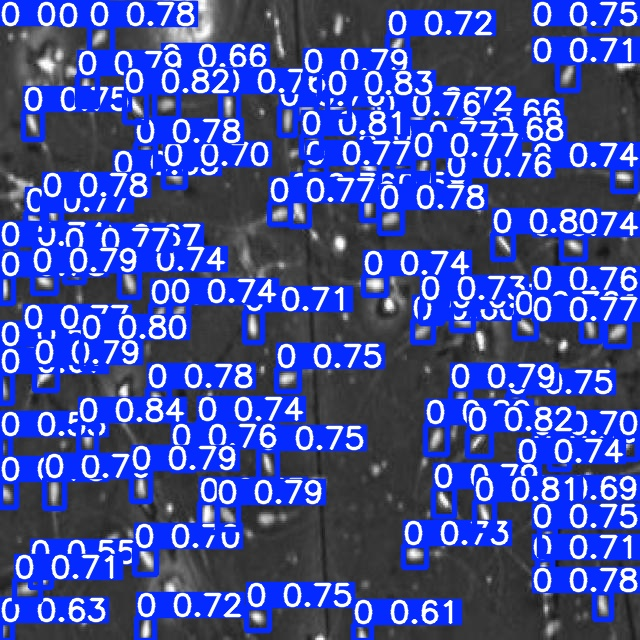

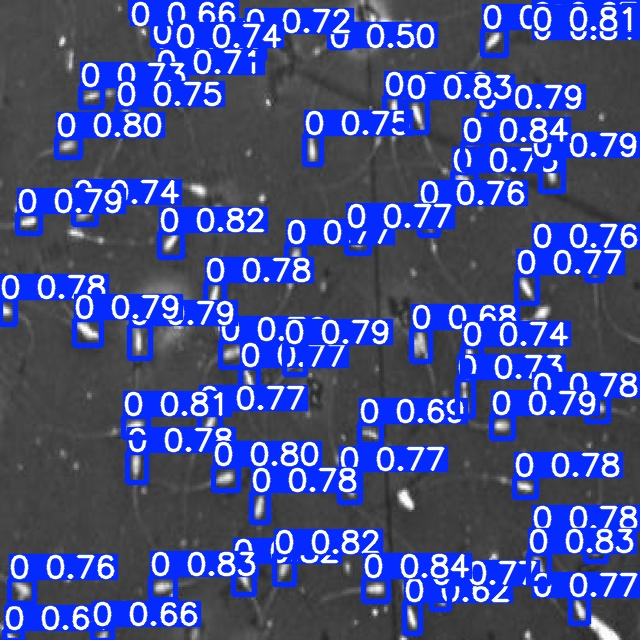

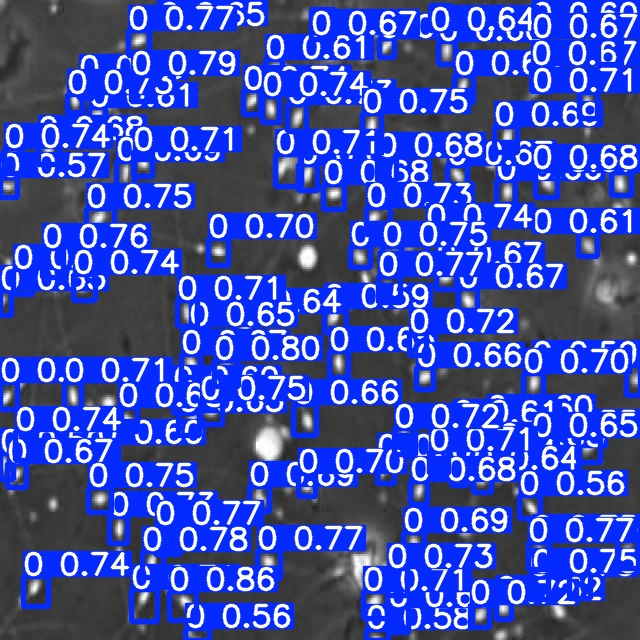

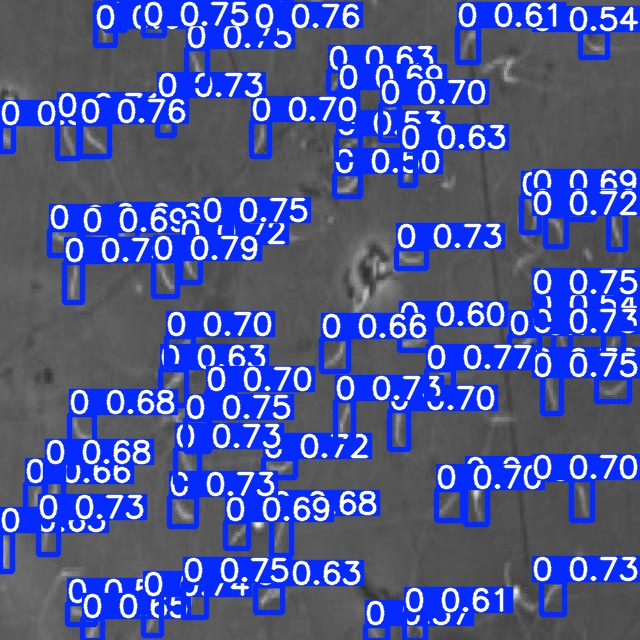

In [8]:
import glob
from IPython.display import Image,display

i=0

for imageName in glob.glob("/content/yolov5/runs/detect/exp/*.jpg"):
  i += 1
  if(i < 5):
    display(Image(filename=imageName))
    print("\n")